In [80]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras
from keras.utils import to_categorical

### Load the data

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Normalize the data
#### This is done to scale our training and test data between 0 and 1, done by dividing by total number of pixels in an image

In [3]:
x_train = x_train.reshape((60000, 28, 28)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28)).astype('float32') / 255

#### This is some other method to transform our training data, since our training data uses classes as numbers, to_categorical will transform those numbers in proper vectors for using with the model.
#### converts a class vector (integers) to binary class matrix. This is useful when we have a classification problem with more than two classes. The function takes the class vector as input and returns a binary matrix representation of the input classes.

In [4]:
y_train = to_categorical(y_train,dtype ="uint8")
y_test = to_categorical(y_test,dtype ="uint8")

### Check the shape of the data

In [1]:
x_train.shape

NameError: name 'x_train' is not defined

In [6]:
y_train.shape

(60000, 10)

In [6]:
x_test.shape

(10000, 28, 28)

In [40]:
y_test.shape

(10000, 10)

## Preprocessing

### Visualization of the data

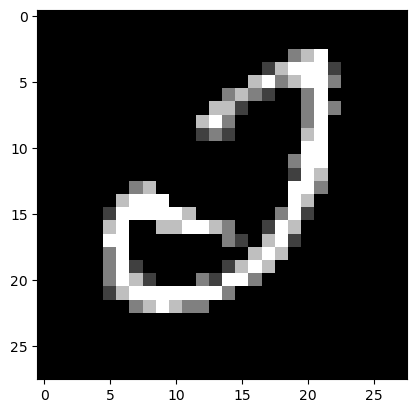

In [16]:
plt.imshow(x_train[178],cmap=plt.get_cmap('gray'))

### First CNN model

#### So i decided to do some reading and research so that we could have something different with everyone and we discuss.
#### This model is of course a sequential model using Keras in tensorflow, first it flattens the data [from two dimension to one dimension 28*28]
#### ,so it does batch normalization to each input of a layer then the output as well before an activation
#### function is applied.


In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10,activation ="softmax")
])

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model to the training data
model.fit(x_train, y_train, epochs=30, batch_size=64, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/30
750/750 [==============================] - 8s 9ms/step - loss: 0.2398 - accuracy: 0.9302 - val_loss: 0.1232 - val_accuracy: 0.9628
Epoch 2/30
750/750 [==============================] - 7s 9ms/step - loss: 0.0994 - accuracy: 0.9695 - val_loss: 0.0919 - val_accuracy: 0.9714
Epoch 3/30
750/750 [==============================] - 6s 9ms/step - loss: 0.0644 - accuracy: 0.9796 - val_loss: 0.0952 - val_accuracy: 0.9734
Epoch 4/30
750/750 [==============================] - 7s 9ms/step - loss: 0.0458 - accuracy: 0.9862 - val_loss: 0.0829 - val_accuracy: 0.9754
Epoch 5/30
750/750 [==============================] - 7s 9ms/step - loss: 0.0372 - accuracy: 0.9879 - val_loss: 0.0870 - val_accuracy: 0.9753
Epoch 6/30
750/750 [==============================] - 7s 9ms/step - loss: 0.0320 - accuracy: 0.9898 - val_loss: 0.0852 - val_accuracy: 0.9762
Epoch 7/30
750/750 [==============================] - 7s 9ms/step - loss: 0.0250 - accuracy: 0.9921 - val_loss: 0.0892 - val_accuracy: 0.9762
Epoch 

### Second CNN model

In [1]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
# Reshape and normalize the data
x_train = x_train.reshape((60000, 28, 28,1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28,1)).astype('float32') / 255

In [11]:
# one-hot encoding using the 'to_categorical' function
y_train = to_categorical(y_train,dtype ="uint8")
y_test = to_categorical(y_test,dtype ="uint8")

In [12]:
### second model initialization
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

### Tried 'adam' optimizer and epochs = 10

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model to the training data
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/10
750/750 [==============================] - 31s 40ms/step - loss: 0.0066 - accuracy: 0.9977 - val_loss: 0.0432 - val_accuracy: 0.9910
Epoch 2/10
750/750 [==============================] - 31s 41ms/step - loss: 0.0049 - accuracy: 0.9982 - val_loss: 0.0532 - val_accuracy: 0.9902
Epoch 3/10
750/750 [==============================] - 31s 42ms/step - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.0578 - val_accuracy: 0.9886
Epoch 4/10
750/750 [==============================] - 29s 39ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.0616 - val_accuracy: 0.9884
Epoch 5/10
750/750 [==============================] - 36s 47ms/step - loss: 0.0063 - accuracy: 0.9977 - val_loss: 0.0545 - val_accuracy: 0.9889
Epoch 6/10
750/750 [==============================] - 44s 58ms/step - loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.0475 - val_accuracy: 0.9912
Epoch 7/10
750/750 [==============================] - 41s 55ms/step - loss: 0.0043 - accuracy: 0.9986 - val_loss: 0.0578 - val_accuracy:

### Tried 'rmsprop' optimizer and epochs = 10

In [15]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model to the training data
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/10
750/750 [==============================] - 41s 54ms/step - loss: 3.2666e-04 - accuracy: 0.9999 - val_loss: 0.0649 - val_accuracy: 0.9912
Epoch 2/10
750/750 [==============================] - 41s 55ms/step - loss: 1.2722e-04 - accuracy: 1.0000 - val_loss: 0.0666 - val_accuracy: 0.9915
Epoch 3/10
750/750 [==============================] - 39s 53ms/step - loss: 1.0171e-05 - accuracy: 1.0000 - val_loss: 0.0663 - val_accuracy: 0.9919
Epoch 4/10
750/750 [==============================] - 40s 54ms/step - loss: 1.7530e-06 - accuracy: 1.0000 - val_loss: 0.0679 - val_accuracy: 0.9917
Epoch 5/10
750/750 [==============================] - 42s 56ms/step - loss: 1.1364e-06 - accuracy: 1.0000 - val_loss: 0.0689 - val_accuracy: 0.9917
Epoch 6/10
750/750 [==============================] - 44s 59ms/step - loss: 9.0836e-07 - accuracy: 1.0000 - val_loss: 0.0696 - val_accuracy: 0.9915
Epoch 7/10
750/750 [==============================] - 43s 57ms/step - loss: 7.6706e-07 - accuracy: 1.0000 - val_

### Tried 'adam' optimizer and epochs = 10 and batch_size = 128

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model to the training data
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/10
375/375 [==============================] - 18s 47ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0756 - val_accuracy: 0.9902
Epoch 2/10
375/375 [==============================] - 24s 63ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0779 - val_accuracy: 0.9905
Epoch 3/10
375/375 [==============================] - 36s 97ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0974 - val_accuracy: 0.9903
Epoch 4/10
375/375 [==============================] - 36s 97ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0752 - val_accuracy: 0.9908
Epoch 5/10
375/375 [==============================] - 36s 96ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0824 - val_accuracy: 0.9896
Epoch 6/10
375/375 [==============================] - 36s 96ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0821 - val_accuracy: 0.9898
Epoch 7/10
375/375 [==============================] - 37s 98ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0736 - val_accuracy:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.datasets import make_classification

cross_val_scores = cross_val_score(svm_model, X,y, cv=5)
print ('Cross validation scores:',cross_val_scores)

### Hyperparameter tuning for second model

In [ ]:
# KerasClassifier object
model = KerasClassifier(build_fn=create_model)

# hyperparameters for optimization search
param_grid = {'batch_size': [16, 32, 64,128],
              'epochs': [10, 20, 30,40],
              'optimizer': ['adam', 'rmsprop']}

# Then a grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Print out best hyperparameters
print(f"The best hyperparameters are: {grid_result.best_params_}")

### Trying KNN algorithm

In [1]:
# Import necessary libraries
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
# Load the MNIST dataset, this one is 1D however we can flatten it as above 28*28
mnist = fetch_openml('mnist_784')
x, y = mnist['data'], mnist['target']

# Split the data into training and testing sets, made sure its 60000 -test, 10000-train for comparison purposes
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.14285714, random_state=20)

# Initializing the KNN classifier, let the number of k = 3 at first
KNN_model = KNeighborsClassifier(n_neighbors=3)  


C:\Users\DELL5430 i7\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### lets look at the data 

In [3]:
x_train.shape

(60000, 784)

In [ ]:
y_train.shape

In [ ]:
x_test.shape

In [5]:
# Train the classifier
KNN_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
# Make predictions on the test set
y_pred = KNN_model.predict(x_test)

In [7]:
# Evaluate the accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9741


In [8]:
# You can also print other metrics like confusion matrix, classification report, etc.
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[ 971    1    1    0    0    3    4    1    2    0]
 [   0 1141    0    1    0    0    0    1    0    0]
 [   4    7  989    2    0    1    1   14    0    0]
 [   2    3    9 1025    0    7    0    3    5    2]
 [   0   10    2    0  907    0    3    2    0   16]
 [   2    1    1    8    0  860   12    0    0    3]
 [   2    1    0    0    2    3 1004    0    0    0]
 [   1   10    4    0    0    0    0 1016    0   10]
 [   1    8    3   18    4   11    5    1  903   14]
 [   0    0    1    7   10    0    1    8    0  925]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       983
           1       0.97      1.00      0.98      1143
           2       0.98      0.97      0.98      1018
           3       0.97      0.97      0.97      1056
           4       0.98      0.96      0.97       940
           5       0.97      0.97      0.97       887
           6       0.97      0.99      0.98      1012
           7       0.97      0.98   

### try some cross validation and determine the best K value

In [36]:
# import KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
# create empty list to store error values
error_rate=[]

for i in range(1,11):
    KNN_model=KNeighborsClassifier(n_neighbors=i)
    KNN_model.fit(x_train,y_train)
    y_pred=KNN_model.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))
error_rate

[0.02557142857142857,
 0.033857142857142856,
 0.028142857142857143,
 0.028714285714285713,
 0.02957142857142857,
 0.03,
 0.03014285714285714,
 0.030857142857142857,
 0.030714285714285715,
 0.032]

Best k value: 3


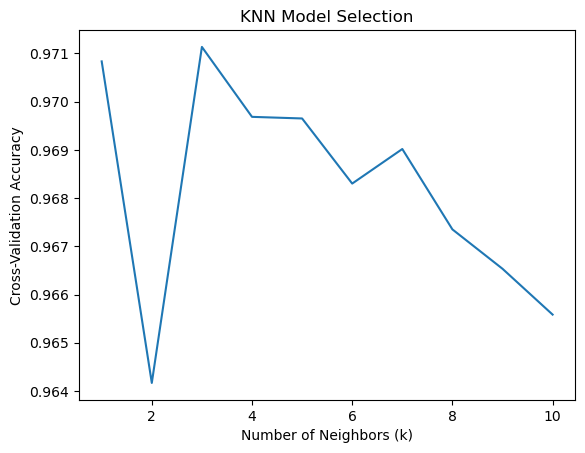

In [3]:
from sklearn.model_selection import cross_val_score

# Define a range of k values to try
k_values = list(range(1, 11))  # You can adjust the range based on your preference

# Initialize an empty list to store cross-validation scores
cv_scores = []

# Perform k-fold cross-validation for each k
for k in k_values:
    KNN_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(KNN_model, x_train, y_train, cv=5, scoring='accuracy')  
    cv_scores.append(scores.mean())

# Find the k value with the highest cross-validation score
best_k = k_values[cv_scores.index(max(cv_scores))]

print(f'Best k value: {best_k}')

# Plot the cross-validation scores for different k values
import matplotlib.pyplot as plt

plt.plot(k_values, cv_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN Model Selection')
plt.show()


In [9]:
# Make predictions on the test set
y_pred = KNN_model.predict(x_test)

In [12]:
# Evaluate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       983
           1       0.97      1.00      0.98      1143
           2       0.98      0.97      0.98      1018
           3       0.97      0.97      0.97      1056
           4       0.98      0.96      0.97       940
           5       0.97      0.97      0.97       887
           6       0.97      0.99      0.98      1012
           7       0.97      0.98      0.97      1041
           8       0.99      0.93      0.96       968
           9       0.95      0.97      0.96       952

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### Support vector machine

In [13]:
# Import all the necessary libraries
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics

# Load the MNIST dataset, this one is already flattened and its available,however you can do it yourself
mnist = fetch_openml('mnist_784')
x, y = mnist['data'], mnist['target']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.14285714, random_state=20)


C:\Users\DELL5430 i7\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

# Initialize the SVM classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the classifier
svm_model.fit(x_train_std, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(x_test_std)

# Evaluate the performance of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# You can also print other metrics like confusion matrix, classification report, etc.
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.9281
[[ 956    0    6    2    1    6    7    1    2    2]
 [   0 1122    6    3    1    2    0    2    7    0]
 [   9   17  930   16    3    2   18    6   15    2]
 [   6    5   30  961    1   17    1    7   18   10]
 [   6    5   11    2  885    1    5    2    2   21]
 [  11    4    6   31    7  795   11    3   14    5]
 [  10    3   14    0   11   10  963    1    0    0]
 [   1    7   16    6   18    2    0  967    2   22]
 [   6   12   19   35    3   22    6    5  855    5]
 [   3    1    6   14   34    6    1   34    6  847]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       983
           1       0.95      0.98      0.97      1143
           2       0.89      0.91      0.90      1018
           3       0.90      0.91      0.90      1056
           4       0.92      0.94      0.93       940
           5       0.92      0.90      0.91       887
           6       0.95      0.95      0.95      1012
           7       

In [14]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

# Initialize the SVM classifier
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)

# Train the classifier
svm_model.fit(x_train_std, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(x_test_std)

# Evaluate the performance of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# You can also print other metrics like confusion matrix, classification report, etc.
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.9672
[[ 966    0    3    2    0    4    4    1    3    0]
 [   0 1122    6    2    2    0    1    5    3    2]
 [   1    1  983   10    2    1    3   13    3    1]
 [   0    1   11 1012    2    6    1   16    5    2]
 [   0    1   11    0  910    0    2    8    0    8]
 [   3    0    2    8    2  850    7    9    4    2]
 [   1    0    4    1    3    4  995    4    0    0]
 [   1    4    9    0    5    0    0 1012    0   10]
 [   0    2    5    7    1    9    3    8  928    5]
 [   1    1    5    8   14    1    0   23    5  894]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       983
           1       0.99      0.98      0.99      1143
           2       0.95      0.97      0.96      1018
           3       0.96      0.96      0.96      1056
           4       0.97      0.97      0.97       940
           5       0.97      0.96      0.96       887
           6       0.98      0.98      0.98      1012
           7       